# Project - deep learning modeling and optimization

In this project you'll be required to implement an architecture of a network, train it on dataset while comparing different optimizers and eventually optimize it using TensorRT.

## Implement and train the model
Hereby shown the architecture of a well known classifier VGG-19:

|Layer Type|	Feature Map|	Size	|Kernel Size|	Stride	|Activation|
| :-: | :-: | :-: | :-: | :-: | :-: |
|Image|	1	|224×224|	–|	–|	–|
|Convolution|	64|	224×224|	3×3|	1|	ReLU|
|Convolution|	64|	224×224|	3×3|	1|	ReLU|
|Max Pooling|	64|	112×112|	2×2|	2|	–|
|Convolution|	128|	112×112|	3×3|	1|	ReLU|
|Convolution|	128|	112×112|	3×3|	1|	ReLU|
|Max Pooling|	128|	56×56|	2×2|	2|	–|
|Convolution|	256|	56×56|	3×3|	1|	ReLU|
|Convolution|	256|	56×56|	3×3|	1|	ReLU|
|Convolution|	256|	56×56|	3×3|	1|	ReLU|
|Convolution|	256|	56×56|	3×3|	1|	ReLU|
|Max Pooling|	256|	28×28|	2×2|	2|	–|
|Convolution|	512|	28×28|	3×3|	1|	ReLU|
|Convolution|	512|	28×28|	3×3|	1|	ReLU|
|Convolution|	512|	28×28|	3×3|	1|	ReLU|
|Convolution|	512|	28×28|	3×3|	1|	ReLU|
|Max Pooling|	512|	14×14|	2×2|	2|	–|
|Convolution|	512|	14×14|	3×3|	1|	ReLU|
|Convolution|	512|	14×14|	3×3|	1|	ReLU|
|Convolution|	512|	14×14|	3×3|	1|	ReLU|
|Convolution|	512|	14×14|	3×3|	1|	ReLU|
|Max Pooling|	512|	7×7|	2×2|	2|	–|
|Fully Connected|	–|	4096|	–|	–|	ReLU|
|Fully Connected|	–|	4096|	–|	–|	ReLU|
|Fully Connected|	–|	1000|	–|	–|	Softmax|

Please implement this network architecture in tensorflow and load pretrained weights into it.

Choose the proper metrics to evaluate model performance and perform model evaluation.


### Import necessary libs

In [2]:
#!pip3 install tensorflow-datasets==4.1.0
#!pip3 install tensorflow pandas

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ubuntu/anaconda3/envs/tensorflow2_p36/bin/python -m pip install --upgrade pip' command.
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ubuntu/anaconda3/envs/tensorflow2_p36/bin/python -m pip install --upgrade pip' command.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

### Load the data

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

  0%|          | 0/1 [00:00<?, ? splits/s]

  0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling and writing examples to /home/ubuntu/tensorflow_datasets/imagenet_v2/matched-frequency/1.0.0.incompleteU2GZQZ/imagenet_v2-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset imagenet_v2 downloaded and prepared to /home/ubuntu/tensorflow_datasets/imagenet_v2/matched-frequency/1.0.0. Subsequent calls will reuse this data.


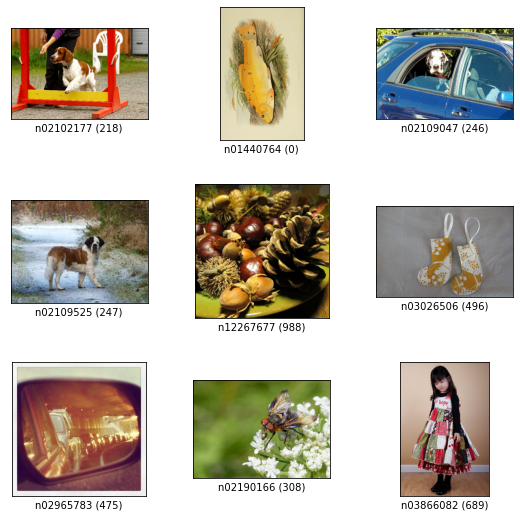

In [5]:
ds, info = tfds.load('imagenet_v2', split='test', with_info=True, as_supervised=True)

fig = tfds.show_examples(ds, info)

### Data preprocessing

In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

def preprocess(image, label):
    i = image
    i = tf.cast(i, tf.float32)
    i = tf.image.resize_with_crop_or_pad(i, 224, 224)
    i = tf.keras.applications.vgg19.preprocess_input(i)
    return (i, label)


In [4]:
# Preprocess the images
ds = ds.map(preprocess)
ds = ds.batch(1)

### Implement and build model

In [10]:
# let tensorflow allocate memory whenever it is needed
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [6]:
from tensorflow.keras.initializers import he_normal
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_initializer=he_normal(), padding='same', input_shape=(224, 224, 3)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_initializer=he_normal(), padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
     
        
        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_initializer=he_normal(), padding='same'),
        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_initializer=he_normal(), padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
     
        
        tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu',kernel_initializer=he_normal(), padding='same'),
        tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu',kernel_initializer=he_normal(), padding='same'),
        tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu',kernel_initializer=he_normal(), padding='same'),
        tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu',kernel_initializer=he_normal(), padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      

        tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu',kernel_initializer=he_normal(), padding='same'),
        tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu',kernel_initializer=he_normal(), padding='same'),
        tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu',kernel_initializer=he_normal(), padding='same'),
        tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu',kernel_initializer=he_normal(), padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu',kernel_initializer=he_normal(), padding='same'),
        tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu',kernel_initializer=he_normal(), padding='same'),
        tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu',kernel_initializer=he_normal(), padding='same'),
        tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu',kernel_initializer=he_normal(), padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
       
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='softmax'),
    
    ])

Reduce GPU usage:

In [8]:
!nvidia-smi

Wed Aug 11 17:56:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.80.02    Driver Version: 450.80.02    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           On   | 00000000:00:1E.0 Off |                    0 |
| N/A   46C    P0    70W / 149W |    142MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [14]:
#!apt update 
#!apt install lsof
!lsof /dev/nvidia0

COMMAND  PID   USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
python  4199 ubuntu  mem    CHR  195,0           314 /dev/nvidia0
python  4199 ubuntu   46u   CHR  195,0      0t0  314 /dev/nvidia0
python  4199 ubuntu   47u   CHR  195,0      0t0  314 /dev/nvidia0
python  4199 ubuntu   48u   CHR  195,0      0t0  314 /dev/nvidia0
python  4199 ubuntu   52u   CHR  195,0      0t0  314 /dev/nvidia0
python  4199 ubuntu   53u   CHR  195,0      0t0  314 /dev/nvidia0
python  4199 ubuntu   54u   CHR  195,0      0t0  314 /dev/nvidia0


### Load weights to model

In [27]:
import zipfile
import h5py
import pandas as pd

print(h5py.__version__)# Make sure the version is 2.9 or above
zf = zipfile.ZipFile('vgg19_weights_tf_dim_ordering_tf_kernels.h5.zip')
print(zf.namelist())# get the name of the fileobject

fiz = zf.open('vgg19_weights_tf_dim_ordering_tf_kernels.h5')

hf = h5py.File(fiz,'r')

print(list(hf.keys())) # To see the datasets inside h5 File

3.1.0
['vgg19_weights_tf_dim_ordering_tf_kernels.h5']
['block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_conv4', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_conv4', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_conv4', 'block5_pool', 'fc1', 'fc2', 'flatten', 'predictions']


In [8]:
# Loads the weights

from tensorflow.keras.applications.vgg19 import VGG19
model1 = VGG19(include_top=True, weights='imagenet')

model.set_weights(model1.get_weights())

574717952/574710816 [==============================] - 4s 0us/step


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 56, 56, 256)      

Compile:

In [9]:
# compile model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
          loss=tf.keras.losses.SparseCategoricalCrossentropy(),
          metrics=['accuracy'])

### Evalutate the model

In [10]:
# Evaluate the model
loss, acc = model.evaluate(ds, verbose=2)
print("Accuracy: {:5.2f}%".format(100 * acc))

10000/10000 - 476s - loss: 2.0497 - accuracy: 0.5585
Accuracy: 55.85%


In [5]:
labels = np.concatenate([y for x, y in ds.take(800)], axis=0)
imgs = np.concatenate([x for x, y in ds.take(800)], axis=0)

238


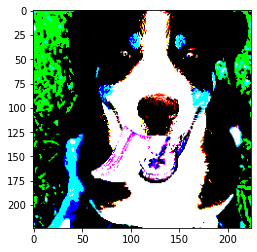

In [25]:
plt.imshow(imgs[30])
print(labels[30])

In [26]:
features = model.predict(np.asanyarray([imgs[30]]))
p = decode_predictions(features)
p

[[('n02108000', 'EntleBucher', 0.47502786),
  ('n02107574', 'Greater_Swiss_Mountain_dog', 0.33820033),
  ('n02107908', 'Appenzeller', 0.18629165),
  ('n02107683', 'Bernese_mountain_dog', 0.0002188523),
  ('n02089867', 'Walker_hound', 8.7807515e-05)]]

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

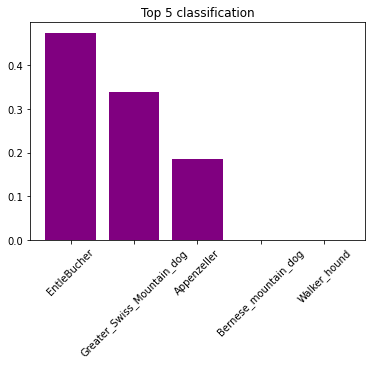

In [27]:
names = [x[1] for x in p[0]]
prob = [x[2] for x in p[0]]

plt.title('Top 5 classification')
plt.bar(names, prob, color='purple') 
plt.xticks(rotation=45)

### Save the model

In [11]:
model.save('./saved_model')

INFO:tensorflow:Assets written to: ./saved_model/assets


INFO:tensorflow:Assets written to: ./saved_model/assets


### Evaluate the model GPU usage

In [6]:
import multiprocessing
import time
import subprocess as sp
import os

num_of_iteration = 500

def get_gpu_memory():
    _output_to_list = lambda x: x.decode('ascii').split('\n')[:-1]

    ACCEPTABLE_AVAILABLE_MEMORY = 1024
    COMMAND = "nvidia-smi --query-gpu=memory.free --format=csv"
    memory_free_info = _output_to_list(sp.check_output(COMMAND.split()))[1:]
    memory_free_values = [int(x.split()[0]) for i, x in enumerate(memory_free_info)]
    return memory_free_values

def evaluate_model_gpu_from_path(path):
    mem_before = get_gpu_memory()[0]
    print("Available GPU Memory before loading: ", mem_before)

    model = tf.keras.models.load_model(path)
    mem_after = get_gpu_memory()[0]
    print("Available GPU Memory after loading: ", mem_after)

    
    start_time = time.time()
    success = 0
    for i in range(num_of_iteration):
        pic = np.argmax(model.predict(np.asanyarray([imgs[i]]),), axis=-1)
        if pic[0] == labels[i]:
            success += 1
            

    print("Average FPS: ", num_of_iteration / (time.time() - start_time))
    print("GPU Memory Usage: " + str(mem_before - mem_after) + " MiB")
    print('\nTest accuracy:', float(success) / num_of_iteration)

In [29]:
evaluate_model_gpu_from_path('./saved_model')

Available GPU Memory before loading:  339
Available GPU Memory after loading:  339
Average FPS:  11.128952997389577
GPU Memory Usage: 0 MiB

Test accuracy: 0.526


## Optimize the model using TensorRT

After training of the model and evaluating it, your goal is to optimize the model for inference on target machine using TensorRT (use TF-TRT in this project).

Try quantizing the model for different percisions using TensorRT quantization features, compare the different percision modes and recommand what you choose.

> Bonus: if you were working on Tesla T4 GPU, what percision mode had you chosen then?

In [30]:
# check TensorRT version
print("TensorRT version: ")
!dpkg -l | grep nvinfer

TensorRT version: 
ii  libnvinfer-bin                         7.2.3-1+cuda11.1                  amd64        TensorRT binaries
ii  libnvinfer-dev                         7.2.3-1+cuda11.1                  amd64        TensorRT development libraries and headers
ii  libnvinfer-plugin-dev                  7.2.3-1+cuda11.1                  amd64        TensorRT plugin libraries and headers
ii  libnvinfer-plugin7                     7.2.3-1+cuda11.1                  amd64        TensorRT plugin library
ii  libnvinfer7                            7.2.3-1+cuda11.1                  amd64        TensorRT runtime libraries


In [7]:
from tensorflow.python.saved_model import signature_constants
from tensorflow.python.saved_model import tag_constants
from tensorflow.python.framework import convert_to_constants

In [8]:
num_of_iteration = 500

def evaluate_trt_from_path(path):
    mem_before = get_gpu_memory()[0]
    print("Available GPU Memory before loading: ", mem_before)

    #model = tf.saved_model.load(path)
    saved_model_loaded = tf.saved_model.load(path, tags=[tag_constants.SERVING])
    
    mem_after = get_gpu_memory()[0]
    print("Available GPU Memory after loading: ", mem_after)

    graph_func = saved_model_loaded.signatures[signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY]
    frozen_func = convert_to_constants.convert_variables_to_constants_v2(graph_func)
    
    success = 0
    for i in range(num_of_iteration):
        #pic = np.argmax(model.signatures['serving_default']([imgs[i]])['probs'].numpy(), axis=-1)
        pic = frozen_func(imgs[i])[0]
        if pic[0] == labels[i]:
            success += 1
            

    print("Average FPS: ", num_of_iteration / (time.time() - start_time))
    print("GPU Memory Usage: " + str(mem_before - mem_after) + " MiB")
    print('\nTest accuracy:', float(success) / num_of_iteration)

### Build  OptimizedModel  with precision = "FP32"

In [9]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt
import numpy as np

def optimize_model(precision_mode='FP32'):
    converter = trt.TrtGraphConverterV2(input_saved_model_dir='./saved_model',
                                        conversion_params = tf.experimental.tensorrt.ConversionParams(
                                            precision_mode=precision_mode,
                                            maximum_cached_engines=1
                                        )
                                       )


    def my_input_fn():
        # Input for a single inference call, for a network that has two input tensors:
        yield (np.asanyarray([imgs[0]]),)
    def calibration_input_fn():
        # Input for several inference calls:
        for i in range(100):
            yield (np.asanyarray([imgs[i]]),)


    if precision_mode == 'INT8':
         converter.convert(calibration_input_fn=calibration_input_fn)
    else:
        converter.convert()

    converter.build(my_input_fn)
    converter.save('./optimized_%s' %precision_mode)
    print('.....Done.')

In [10]:
optimize_model()

INFO:tensorflow:Linked TensorRT version: (7, 2, 2)


INFO:tensorflow:Linked TensorRT version: (7, 2, 2)


INFO:tensorflow:Loaded TensorRT version: (7, 2, 3)


INFO:tensorflow:Loaded TensorRT version: (7, 2, 3)


INFO:tensorflow:Loaded TensorRT 7.2.3 and linked TensorFlow against TensorRT 7.2.2. This is supported because TensorRT  minor/patch upgrades are backward compatible


INFO:tensorflow:Loaded TensorRT 7.2.3 and linked TensorFlow against TensorRT 7.2.2. This is supported because TensorRT  minor/patch upgrades are backward compatible


INFO:tensorflow:Assets written to: ./optimized_FP32/assets


INFO:tensorflow:Assets written to: ./optimized_FP32/assets


.....Done.


In [34]:
!saved_model_cli show --all --dir optimized_FP32

2021-08-11 17:48:51.905366: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['conv2d_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 224, 224, 3)
        name: serving_default_conv2d_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_2'] tensor_info:
        dtype: DT_FLOAT
        shape: unknown_rank
        name: PartitionedCall:0
  Method name is: tens

In [ ]:
evaluate_trt_from_path('./optimized_FP32')

### Build  OptimizedModel  with precision = "FP16"

In [11]:
optimize_model('FP16')

INFO:tensorflow:Linked TensorRT version: (7, 2, 2)


INFO:tensorflow:Linked TensorRT version: (7, 2, 2)


INFO:tensorflow:Loaded TensorRT version: (7, 2, 3)


INFO:tensorflow:Loaded TensorRT version: (7, 2, 3)


INFO:tensorflow:Loaded TensorRT 7.2.3 and linked TensorFlow against TensorRT 7.2.2. This is supported because TensorRT  minor/patch upgrades are backward compatible


INFO:tensorflow:Loaded TensorRT 7.2.3 and linked TensorFlow against TensorRT 7.2.2. This is supported because TensorRT  minor/patch upgrades are backward compatible


INFO:tensorflow:Assets written to: ./optimized_FP16/assets


INFO:tensorflow:Assets written to: ./optimized_FP16/assets


.....Done.


In [ ]:
evaluate_trt_from_path('./optimized_FP16')

### Build  OptimizedModel  with precision = "INT8"

In [12]:
optimize_model('INT8')

INFO:tensorflow:Linked TensorRT version: (7, 2, 2)


INFO:tensorflow:Linked TensorRT version: (7, 2, 2)


INFO:tensorflow:Loaded TensorRT version: (7, 2, 3)


INFO:tensorflow:Loaded TensorRT version: (7, 2, 3)


INFO:tensorflow:Loaded TensorRT 7.2.3 and linked TensorFlow against TensorRT 7.2.2. This is supported because TensorRT  minor/patch upgrades are backward compatible


INFO:tensorflow:Loaded TensorRT 7.2.3 and linked TensorFlow against TensorRT 7.2.2. This is supported because TensorRT  minor/patch upgrades are backward compatible


INFO:tensorflow:Assets written to: ./optimized_INT8/assets


INFO:tensorflow:Assets written to: ./optimized_INT8/assets


.....Done.


In [ ]:
evaluate_trt_from_path('./optimized_INT8')

## Create Box Blur Cuda kernel with Numba

https://en.wikipedia.org/wiki/Box_blur

Follow the algorithm provided for Box blur (3X3 kernel size) and implement in two ways:
1. Using normal loop iteration over an Image
2. Using numba cuda kernel 

In [9]:
#!apt-get update
#!apt-get install ffmpeg libsm6 libxext6  -y

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-backports InRelease [101 kB]      
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]      
Get:5 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1056 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [39.0 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [478 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [1427 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [6319 B]
Get:10 http://archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [2668 B]
Get:11 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [432 kB]
Get:12 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [30.6 kB]
Get:13 htt

In [10]:
!pip install opencv-python

distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


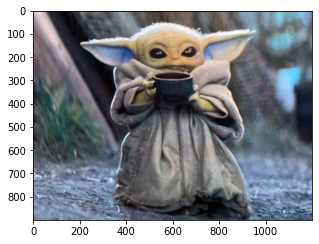

In [97]:
import cv2
import requests
import matplotlib.pyplot as plt
import numpy as np

r = requests.get('https://miro.medium.com/max/1400/1*mk1-6aYaf_Bes1E3Imhc0A.jpeg', allow_redirects=True)
open('blue-yoda.jpg', 'wb').write(r.content)

test_image = cv2.imread('blue-yoda.jpg')
plt.figure(figsize=(5,5))
plt.imshow(test_image)

Resize image to smaller size (make the process faster):

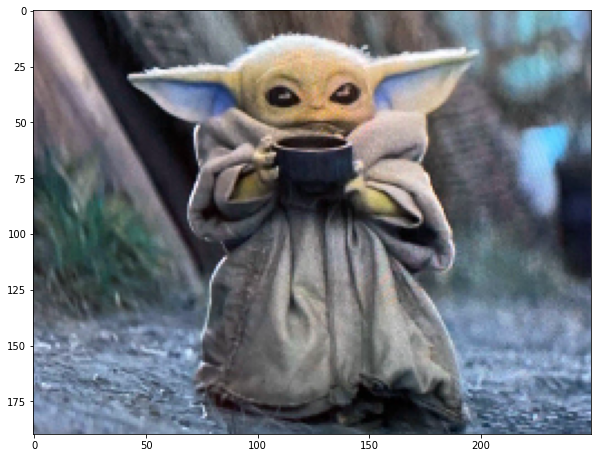

In [98]:
# resize image
resized_image = cv2.resize(test_image, (250, 190))
plt.figure(figsize=(10,10))
plt.imshow(resized_image)

In [99]:
threadsperblock = 32
xblocks = (resized_image.shape[1] + (threadsperblock - 1)) // threadsperblock
yblocks = (resized_image.shape[0] + (threadsperblock - 1)) // threadsperblock

print("Xblocks: ", xblocks)
print("Yblocks: ", yblocks)

Xblocks:  8
Yblocks:  6


In [14]:
!pip install numba

distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 3.4 MB 17.9 MB/s eta 0:00:01
     |████████████████████████████████| 25.3 MB 44.8 MB/s eta 0:00:01
  distutils: /usr/local/lib/python3.8/dist-packages
  sysconfig: /usr/lib/python3.8/site-packages
  distutils: /usr/local/lib/python3.8/dist-packages
  sysconfig: /usr/lib/python3.8/site-packages
  distutils: /usr/local/include/python3.8/llvmlite
  sysconfig: /usr/include/python3.8/llvmlite
  distutils: /usr/local/bin
  sysconfig: /usr/bin
  distutils: /usr/local
  sysconfig: /usr
  user = False
  home = None
  root = None
  prefix = None
  distutils: 

In [86]:
@cuda.jit
def convolute_2d(image, kernel, kernel_size, output):
    y,x = cuda.grid(2)
    
    if x + kernel_size < image.shape[0] and y + kernel_size < image.shape[1]:
        sum = 0
        for i in range(kernel_size):
            for j in range(kernel_size):
                sum += kernel[i,j] * image[x + i, y + j]
        output[x,y] = sum

def convolution_2d_cpu(image, kernel, kernel_size, output):
  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      if x + kernel_size < image.shape[0] and y + kernel_size < image.shape[1]:
        sum = 0
        for i in range(kernel_size):
            for j in range(kernel_size):
                sum += kernel[i,j] * image[x + i, y + j]
        output[x,y] = sum

In [90]:
gray_img = np.zeros(shape=(resized_image.shape[0], resized_image.shape[1]), dtype=np.uint8)

blocks_per_grid = (xblocks, yblocks)

cv_histogram[blocks_per_grid, (threadsperblock, threadsperblock)](resized_image, gray_img)

In [119]:
kernel_box_blur = np.array([[(1/9), (1/9), (1/9)], [(1/9), (1/9), (1/9)], [(1/9), (1/9), (1/9)]]) # Box_Blur kernel
kernel_sharpning = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) # Sharpning kernel
kernel_ed = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]) # Edge detect kernel

blocks_per_grid = (xblocks, yblocks)

390 ms ± 2.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.67 ms ± 43.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Text(0.5, 1.0, 'original')

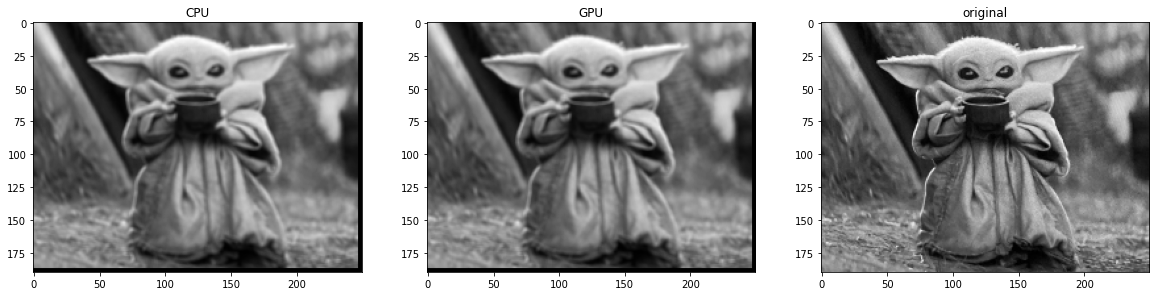

In [116]:
#BOX BLUR
output_cpu = np.zeros(shape=(gray_img.shape[0], gray_img.shape[1]), dtype=np.uint8)
output_gpu = np.zeros(shape=(gray_img.shape[0], gray_img.shape[1]), dtype=np.uint8)

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
%timeit convolution_2d_cpu(gray_img, kernel_box_blur, kernel_box_blur.shape[0], output_cpu)
axs[0].imshow(output_cpu, cmap='gray')
axs[0].grid(False)
axs[0].set_title('CPU')

%timeit convolute_2d[blocks_per_grid, (threadsperblock, threadsperblock)](gray_img, kernel_box_blur, kernel_box_blur.shape[0], output_gpu)
axs[1].imshow(output_gpu, cmap='gray')
axs[1].grid(False)
axs[1].set_title('GPU')

axs[2].imshow(gray_img, cmap='gray')
axs[2].grid(False)
axs[2].set_title('original')

Text(0.5, 1.0, 'original')

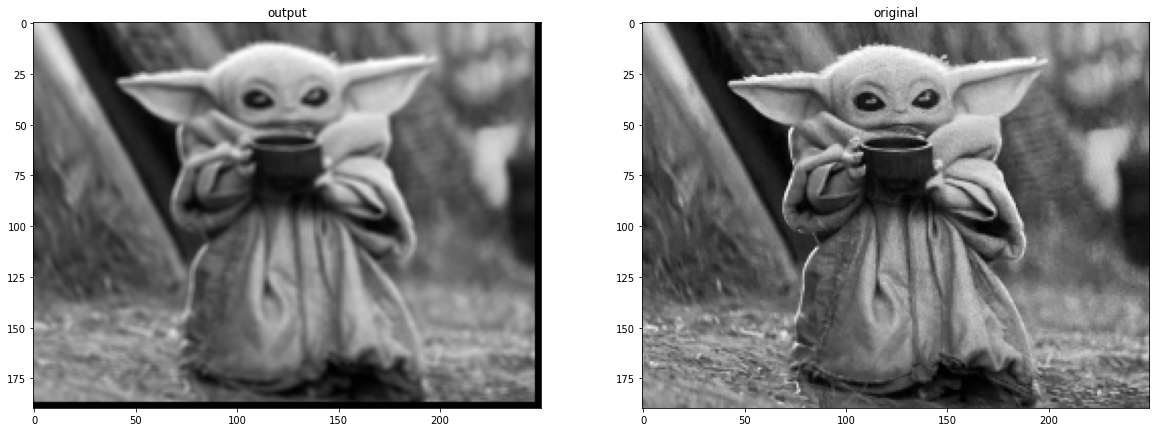

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20))

axs[0].imshow(output_gpu, cmap='gray')
axs[0].grid(False)
axs[0].set_title('output')

axs[1].imshow(gray_img, cmap='gray')
axs[1].grid(False)
axs[1].set_title('original')

### Noise influence on process

386 ms ± 4.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.65 ms ± 4.04 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Text(0.5, 1.0, 'original')

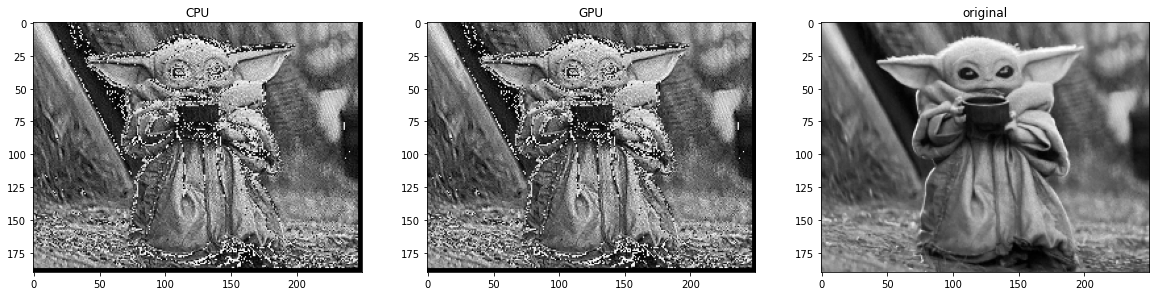

In [117]:
#SHARPNESS
output_cpu = np.zeros(shape=(gray_img.shape[0], gray_img.shape[1]), dtype=np.uint8)
output_gpu = np.zeros(shape=(gray_img.shape[0], gray_img.shape[1]), dtype=np.uint8)

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
%timeit convolution_2d_cpu(gray_img, kernel_sharpning, kernel_sharpning.shape[0], output_cpu)
axs[0].imshow(output_cpu, cmap='gray')
axs[0].grid(False)
axs[0].set_title('CPU')

%timeit convolute_2d[blocks_per_grid, (threadsperblock, threadsperblock)](gray_img, kernel_sharpning, kernel_sharpning.shape[0], output_gpu)
axs[1].imshow(output_gpu, cmap='gray')
axs[1].grid(False)
axs[1].set_title('GPU')

axs[2].imshow(gray_img, cmap='gray')
axs[2].grid(False)
axs[2].set_title('original')

393 ms ± 658 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.75 ms ± 3.38 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Text(0.5, 1.0, 'original')

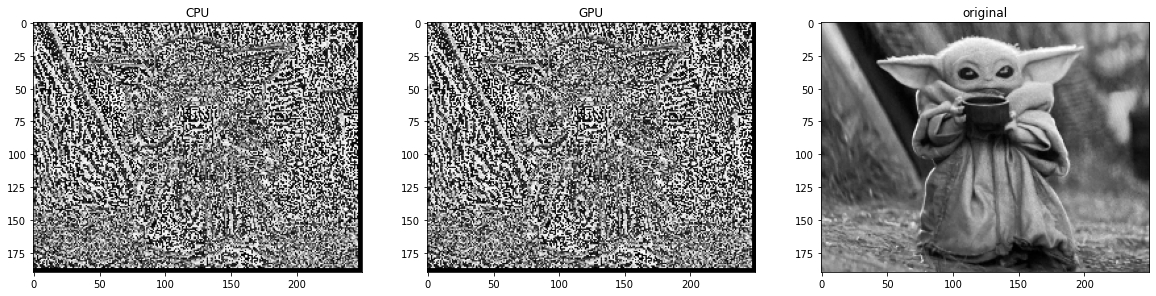

In [120]:
#EDGE DETECT
output_cpu = np.zeros(shape=(gray_img.shape[0], gray_img.shape[1]), dtype=np.uint8)
output_gpu = np.zeros(shape=(gray_img.shape[0], gray_img.shape[1]), dtype=np.uint8)

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
%timeit convolution_2d_cpu(gray_img, kernel_ed, kernel_ed.shape[0], output_cpu)
axs[0].imshow(output_cpu, cmap='gray')
axs[0].grid(False)
axs[0].set_title('CPU')

%timeit convolute_2d[blocks_per_grid, (threadsperblock, threadsperblock)](gray_img, kernel_ed, kernel_ed.shape[0], output_gpu)
axs[1].imshow(output_gpu, cmap='gray')
axs[1].grid(False)
axs[1].set_title('GPU')

axs[2].imshow(gray_img, cmap='gray')
axs[2].grid(False)
axs[2].set_title('original')

Too much noise, lets use the blur trick to get clearer image:

374 ms ± 4.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.74 ms ± 2.47 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Text(0.5, 1.0, 'original')

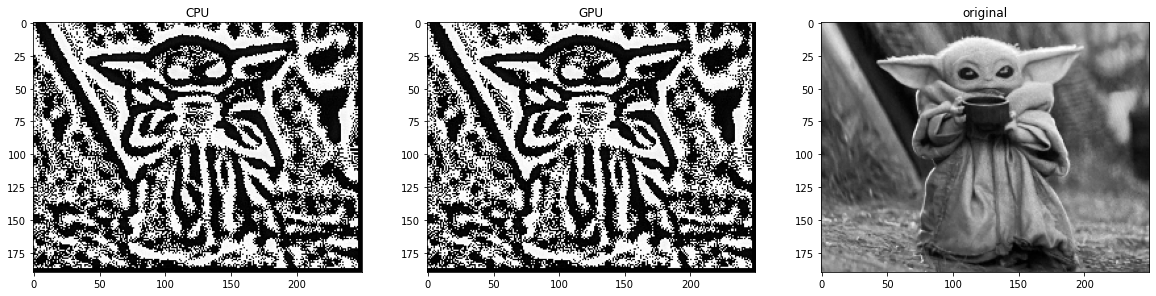

In [121]:
## Trick from canny operator, blur the image first to reduce noise
blur = cv2.GaussianBlur(gray_img, (17,17), 0)

#EDGE DETECT
output_cpu = np.zeros(shape=(blur.shape[0], blur.shape[1]), dtype=np.uint8)
output_gpu = np.zeros(shape=(blur.shape[0], blur.shape[1]), dtype=np.uint8)

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
%timeit convolution_2d_cpu(blur, kernel_ed, kernel_ed.shape[0], output_cpu)
axs[0].imshow(output_cpu, cmap='gray')
axs[0].grid(False)
axs[0].set_title('CPU')

%timeit convolute_2d[blocks_per_grid, (threadsperblock, threadsperblock)](blur, kernel_ed, kernel_ed.shape[0], output_gpu)
axs[1].imshow(output_gpu, cmap='gray')
axs[1].grid(False)
axs[1].set_title('GPU')

axs[2].imshow(gray_img, cmap='gray')
axs[2].grid(False)
axs[2].set_title('original')

Now we can try again the 'sharpening kernel' with noise reduced

387 ms ± 4.11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.65 ms ± 4.42 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Text(0.5, 1.0, 'original')

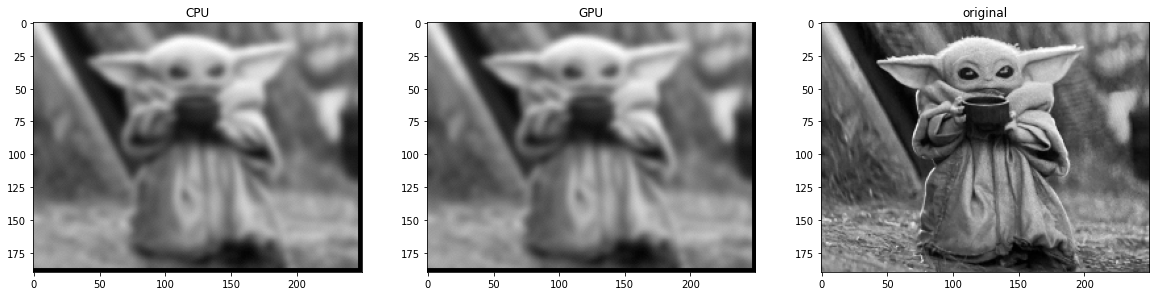

In [122]:
#SHARPENING
output_cpu = np.zeros(shape=(blur.shape[0], blur.shape[1]), dtype=np.uint8)
output_gpu = np.zeros(shape=(blur.shape[0], blur.shape[1]), dtype=np.uint8)

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
%timeit convolution_2d_cpu(blur, kernel_sharpning, kernel_sharpning.shape[0], output_cpu)
axs[0].imshow(output_cpu, cmap='gray')
axs[0].grid(False)
axs[0].set_title('CPU')

%timeit convolute_2d[blocks_per_grid, (threadsperblock, threadsperblock)](blur, kernel_sharpning, kernel_sharpning.shape[0], output_gpu)
axs[1].imshow(output_gpu, cmap='gray')
axs[1].grid(False)
axs[1].set_title('GPU')

axs[2].imshow(gray_img, cmap='gray')
axs[2].grid(False)
axs[2].set_title('original')